In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read data from CSV files into DataFrames and drop the first column
teams_shots = pd.read_csv("data/understat/teams_shots.csv")
teams_shots.drop(columns=teams_shots.columns[0], axis=1, inplace=True)
against_shots = pd.read_csv("data/understat/against_shots.csv")
against_shots.drop(columns=against_shots.columns[0], axis=1, inplace=True)

# Filter shots data to get goals scored by teams
teams_goals = teams_shots[teams_shots['result'] == 'Goal']

# Filter shots data to get goals conceded by teams
against_goals = against_shots[against_shots['result'] == 'Goal']

# Filter shots data to get own goals missed by teams
own_goal_missed = teams_shots[teams_shots['result'] == 'OwnGoal']

# Filter shots data to get own goals scored by against teams
own_goal_scored = against_shots[against_shots['result'] == 'OwnGoal']

# Concatenate own goals scored with regular goals scored
teams_goals = pd.concat([teams_goals, own_goal_scored], ignore_index=True, axis=0)

# Concatenate own goals missed with regular goals conceded
against_goals = pd.concat([against_goals, own_goal_missed], ignore_index=True, axis=0)

# Define the bin edges and labels
bin_edges = [0, 15, 30, 45, 60, 75, 150]
bin_labels = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']

# Create the "minute_group" column using pd.cut
teams_goals['minute_group'] = pd.cut(teams_goals['minute'], bins=bin_edges, labels=bin_labels, right=False)
against_goals['minute_group'] = pd.cut(against_goals['minute'], bins=bin_edges, labels=bin_labels, right=False)

# Count goals scored by teams in each time group
rm_scored = teams_goals[teams_goals['RB_team'] == 'Real Madrid'].groupby('minute_group')['match_id'].count()
barcelona_scored = teams_goals[teams_goals['RB_team'] == 'Barcelona'].groupby('minute_group')['match_id'].count()

# Count goals conceded by teams in each time group
rm_missed = against_goals[against_goals['RB_team'] == 'Real Madrid'].groupby('minute_group')['match_id'].count()
barcelona_missed = against_goals[against_goals['RB_team'] == 'Barcelona'].groupby('minute_group')['match_id'].count()

In [40]:
def scored_missed_goals(team, scored_list, missed_list):
    time_groups = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']
    scored = scored_list
    missed = missed_list
    
    # Create an array of indices for the time groups
    indices = np.arange(len(time_groups))
    
    # Plot the scored goals above the x-axis
    plt.bar(indices, scored, color='green', label='Scored')
    
    # Plot the missed goals under the x-axis
    plt.bar(indices, [-val for val in missed], color='red', label='Missed')
    
    # Customize the plot
    plt.xlabel('Time Groups')
    plt.ylabel('Goals')
    plt.title(f'Scored and Missed Goals for {team} in Time Groups')
    plt.xticks(indices, time_groups)
    plt.legend()
    
    # Show the plot
    plt.show()

In the last 10 La Liga matches, Real Madrid conceded 7 goals, 4 of which were scored in the first 15 minutes of the match. In our match, Barcelona continued this trend, scoring in the 6th minute of the match.
Real Madrid scored the most goals in the first third of the second half.

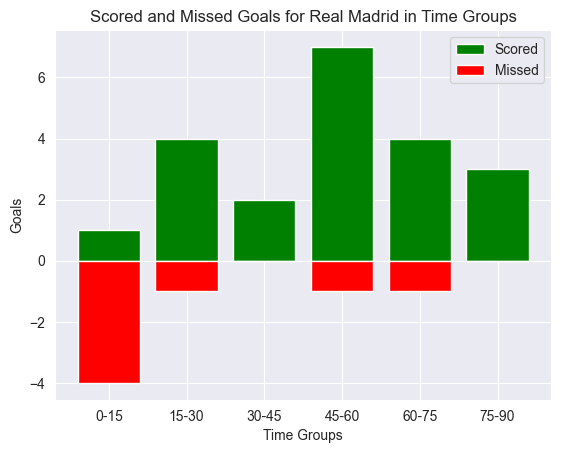

In [41]:
scored_missed_goals('Real Madrid', list(rm_scored.to_dict().values()), list(rm_missed.to_dict().values()))

Over the last 10 La Liga matches, Barcelona scored 22 goals, 15 of which were scored in the last third of the match.

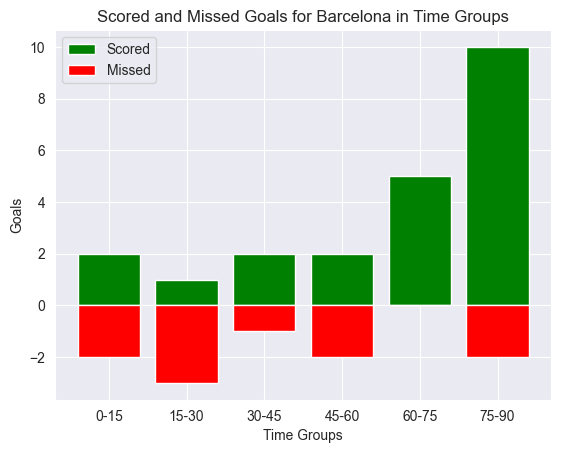

In [42]:
scored_missed_goals('Barcelona', list(barcelona_scored.to_dict().values()), list(barcelona_missed.to_dict().values()))